<a href="https://colab.research.google.com/github/Lavanya-Rachamadugu/Predicting-thermal-performance-of-fins-for-novel-heat-exchanger/blob/main/ML_project_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA IMPORTING AND PREPROCESSING


In [1]:
!git clone https://github.com/Lavanya-Rachamadugu/Predicting-thermal-performance-of-fins-for-novel-heat-exchanger.git

Cloning into 'Predicting-thermal-performance-of-fins-for-novel-heat-exchanger'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), 5.39 MiB | 15.82 MiB/s, done.


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/ML_PROJECT__DATA__SET_FINAL_---.csv')
dataset.head()

,di/do,do,t*=t/do,t,del*=del/do,del,Lexposed,At (total outer surface area),h,qcu (heat flux copper),qo (maximum heat flux possible),qcu/qo (efficiency copper),Qcu (rate of heat transfer copper),Qo (max. rate of HT possible),Ecu (effectiveness copper),M copper
0,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,5,499.875,500,0.999750,37.590600,9.425,3.988393,0.1175
1,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,20,1998.007,2000,0.999004,150.250126,37.700,3.985414,0.4700
2,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,50,4987.556,5000,0.997511,375.064211,94.250,3.979461,1.1750
3,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,100,9950.311,10000,0.995031,748.263387,188.500,3.969567,2.3500
4,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,200,19801.930,20000,0.990097,1489.105136,377.000,3.949881,4.7000


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ML_PROJECT__DATA__SET_FINAL_---.csv to ML_PROJECT__DATA__SET_FINAL_--- (1).csv


In [ ]:
# number of rows and columns
dataset.shape

(150, 16)

In [ ]:
#dataset columns
column_names = dataset.columns
for column_names in column_names:
  print(column_names)

di/do
do
t*=t/do
t
del*=del/do
del
Lexposed
At (total outer surface area)
h
qcu (heat flux copper)
qo (maximum heat flux possible)
qcu/qo (efficiency copper)
Qcu (rate of heat transfer copper)
Qo (max. rate of HT possible)
Ecu (effectiveness copper)
M copper


Data Visualization


In [ ]:
s=[];
i=0;
while(i<150):
    s.append(i)
    i=i+5
dataset.loc[s,["h","t*=t/do","del*=del/do","qcu/qo (efficiency copper)","Ecu (effectiveness copper)"]]




,h,t*=t/do,del*=del/do,qcu/qo (efficiency copper),Ecu (effectiveness copper)
0,5,0.0333,0.1,0.999750,3.988393
5,5,0.0333,0.2,0.999586,5.514957
10,5,0.0333,0.4,0.999478,8.568469
15,5,0.0333,0.8,0.998704,14.665319
20,5,0.0333,1.0,0.998644,17.715998
25,5,0.0333,1.5,0.996940,25.301650
30,5,0.0333,2.0,0.994444,32.835116
35,5,0.0333,4.0,0.979644,62.281452
40,5,0.0333,6.0,0.961670,90.524522
45,5,0.0333,8.0,0.934932,116.576349


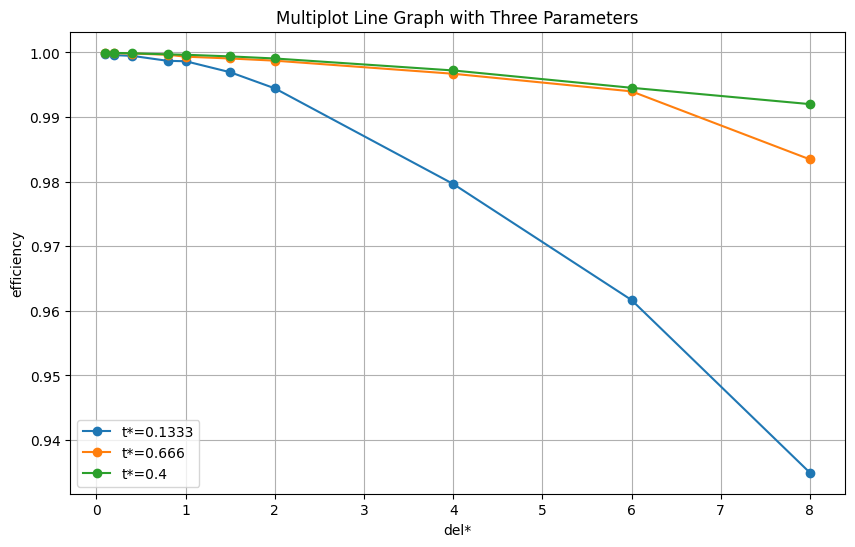

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = [
    0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
    0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666,
    0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000
]

y = [
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0
]

z = [
    0.999750, 0.999586, 0.999478, 0.998704, 0.998644, 0.996940, 0.994444, 0.979644, 0.961670, 0.934932,
    0.999918, 0.999888, 0.999838, 0.999648, 0.999350, 0.999070, 0.998732, 0.996706, 0.993980, 0.983446,
    0.999962, 0.999938, 0.999874, 0.999710, 0.999648, 0.999394, 0.999070, 0.997216, 0.994532, 0.992004
]

# Get unique x values
unique_x_values = np.unique(x)

plt.figure(figsize=(10, 6))

for unique_x in unique_x_values:
    x_values = [y[i] for i in range(len(y)) if x[i] == unique_x]
    z_values = [z[i] for i in range(len(z)) if x[i] == unique_x]
    plt.plot(x_values, z_values, marker='o', label=f'x={unique_x}')

plt.xlabel('del*')
plt.ylabel('efficiency')
plt.title('Multiplot Line Graph with Three Parameters')
plt.legend(["t*=0.1333","t*=0.666","t*=0.4"])
plt.grid(True)
plt.show()


Observation:

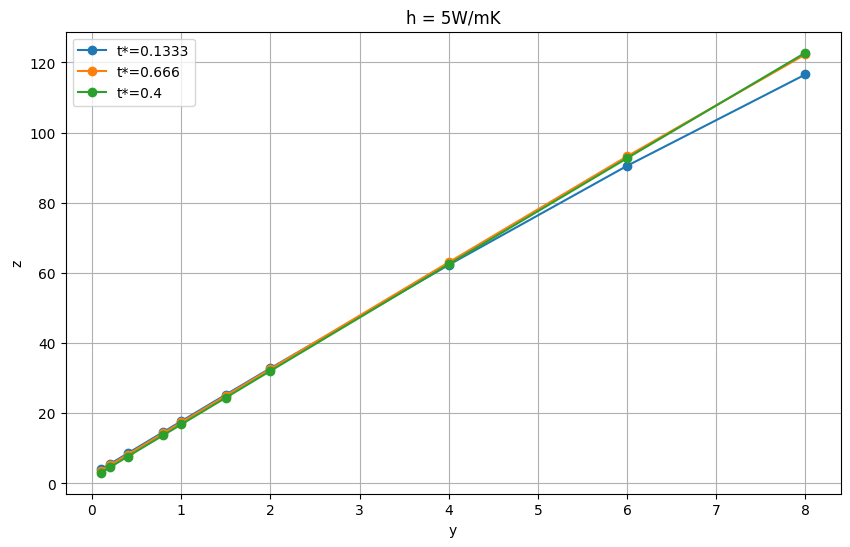

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = [
    0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
    0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666,
    0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000
]

y = [
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0
]

z = [
    3.988393, 5.514957, 8.568469, 14.665319, 17.715998, 25.301650, 32.835116, 62.281452, 90.524522, 116.576349,
    3.649568, 5.177139, 8.232088, 14.339778, 17.389220, 25.016501, 32.637608, 63.027775, 93.228469, 122.291640,
    3.055587, 4.583270, 7.638295, 13.746675, 16.800450, 24.430809, 32.055042, 62.467515, 92.689327, 122.766415
]

# Get unique x values
unique_x_values = np.unique(x)

plt.figure(figsize=(10, 6))

for unique_x in unique_x_values:
    x_values = [y[i] for i in range(len(y)) if x[i] == unique_x]
    z_values = [z[i] for i in range(len(z)) if x[i] == unique_x]
    plt.plot(x_values, z_values, marker='o', label=f'x={unique_x}')

plt.xlabel('del*')
plt.ylabel('effectiveness')
plt.title('h = 5W/mK')
plt.legend(["t*=0.1333","t*=0.666","t*=0.4"])
plt.grid(True)
plt.show()


Observation:

*   for **h**=5W/mK, **effectiveness** is unaltered with increase in **t*** for constant **del***.
*   with increase in **del***, for constant **t***, effectiveness increases linearly.



In [ ]:
u=[];
r=4;
while(r<150):
    u.append(r)
    r=r+5
dataset.loc[u,["h","t*=t/do","del*=del/do","qcu/qo (efficiency copper)","Ecu (effectiveness copper)"]]

,h,t*=t/do,del*=del/do,qcu/qo (efficiency copper),Ecu (effectiveness copper)
4,200,0.0333,0.1,0.990097,3.949881
9,200,0.0333,0.2,0.983673,5.427162
14,200,0.0333,0.4,0.979433,8.396629
19,200,0.0333,0.8,0.949609,13.944398
24,200,0.0333,1.0,0.947362,16.806252
29,200,0.0333,1.5,0.885470,22.472618
34,200,0.0333,2.0,0.802230,26.488469
39,200,0.0333,4.0,0.457937,29.113637
44,200,0.0333,6.0,0.244190,22.986274
49,200,0.0333,8.0,0.185905,23.180462


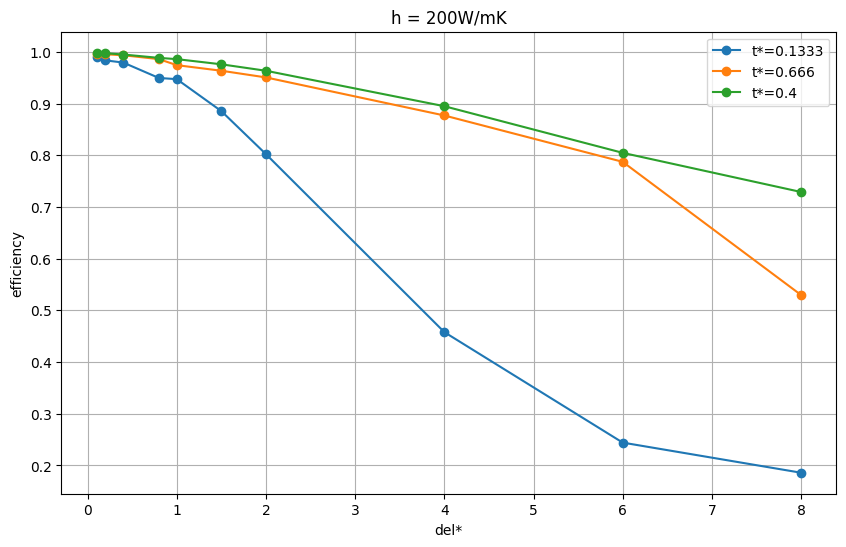

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x= [
    0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
    0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666,
    0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000,
    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200
]

y = [
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
]

z = [
    0.990097, 0.983673, 0.979433, 0.949609, 0.947362, 0.885470, 0.802230, 0.457937, 0.244190, 0.185905,
    0.996746, 0.995529, 0.993583, 0.986078, 0.974420, 0.963613, 0.950699, 0.877067, 0.787381, 0.529775,
    0.998478, 0.997537, 0.995021, 0.988502, 0.986072, 0.976055, 0.963581, 0.894995, 0.804792, 0.729026
]

# Get unique x values
unique_x_values = np.unique(x)

plt.figure(figsize=(10, 6))

for unique_x in unique_x_values:
    x_values = [y[i] for i in range(len(y)) if x[i] == unique_x]
    z_values = [z[i] for i in range(len(z)) if x[i] == unique_x]
    plt.plot(x_values, z_values, marker='o', label=f'x={unique_x}')

plt.xlabel('del*')
plt.ylabel('efficiency')
plt.title('h = 200W/mK')
plt.legend(["t*=0.1333","t*=0.666","t*=0.4"])
plt.grid(True)
plt.show()



Observation:


*   for a constant **t***, with increase in **del***, the efficiency decreases.
*   for a constant **del***, with increase in **t***, the efficiency increases.



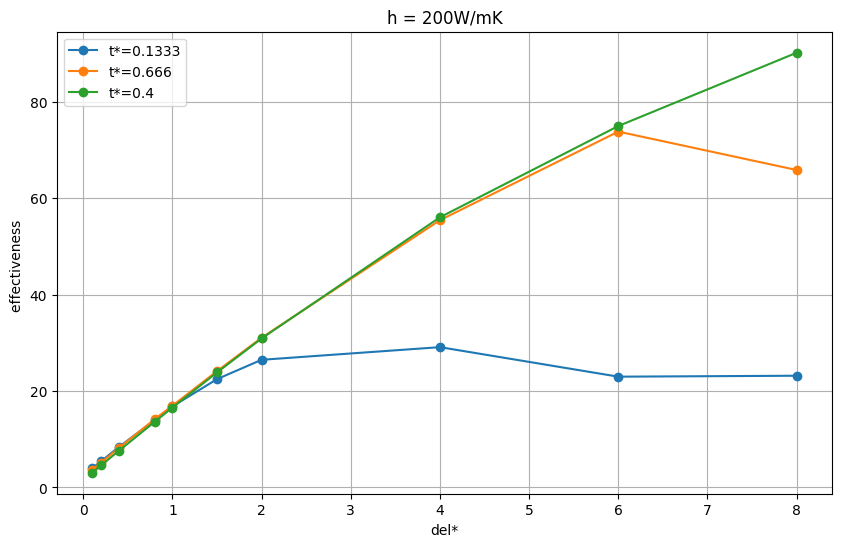

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = [
    0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
    0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666,
    0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000,
]

y = [
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
    0.1, 0.2, 0.4, 0.8, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0,
]

z = [
    3.949881, 5.427162, 8.396629, 13.944398, 16.806252, 22.472618, 26.488469, 29.113637, 22.986274, 23.180462,
    3.637993, 5.154567, 8.180590, 14.145124, 16.955429, 24.128665, 31.067935, 55.462306, 73.850861, 65.877529,
    3.051052, 4.572267, 7.601221, 13.592565, 16.572287, 23.860273, 30.916397, 56.064196, 75.005761, 90.221318,
]

# Get unique x values
unique_x_values = np.unique(x)

plt.figure(figsize=(10, 6))

for unique_x in unique_x_values:
    x_values = [y[i] for i in range(len(y)) if x[i] == unique_x]
    z_values = [z[i] for i in range(len(z)) if x[i] == unique_x]
    plt.plot(x_values, z_values, marker='o', label=f'x={unique_x}')

plt.xlabel('del*')
plt.ylabel('effectiveness ')
plt.title('h = 200W/mK')
plt.legend(["t*=0.1333","t*=0.666","t*=0.4"])
plt.grid(True)
plt.show()



Observation:


*   for  a constant **t***, with increase in **del***, the efficiency increases upto a mark and then decreases.


*  for  a constant **del***, with increase in **t***, the efficiency increases.





Importing the Dependencies

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


features

In [ ]:
X = dataset[['t*=t/do', 'del*=del/do', 'M copper']]
y = dataset[['qcu/qo (efficiency copper)', 'Ecu (effectiveness copper)']]

Training and Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=7)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(150, 3) (97, 3) (53, 3)


In [ ]:
print(X_train)
print(y_train)

     t*=t/do  del*=del/do  M copper
13    0.0333          0.4    5.0500
100   0.4000          0.1    0.0900
81    0.1666          2.0    3.8500
60    0.1666          0.4    0.2425
54    0.1666          0.1    4.3000
..       ...          ...       ...
142   0.4000          6.0   27.4500
92    0.1666          6.0   27.6250
103   0.4000          0.1    1.8000
67    0.1666          0.8    4.2250
25    0.0333          1.5    0.7475

[97 rows x 3 columns]
     qcu/qo (efficiency copper)  Ecu (effectiveness copper)
13                     0.989654                    8.484245
100                    0.999962                    3.055587
81                     0.994939                   32.513673
60                     0.999838                    8.232088
54                     0.996746                    3.637993
..                          ...                         ...
142                    0.946763                   88.237344
92                     0.941541                   88.310052
103  

Model Training --> Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
#training the Linear Regression model with training data
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 38.74413099410409
R-squared (R2) Score: 0.8192323867135372


Making a Predictive System

In [ ]:
import numpy as np

# Your input data
x_testing = [ 0.4,8,145.8]

# Reshape the input data to a 2D array with a single sample
x_testing = np.array(x_testing).reshape(1, -1)

# Now, you can make predictions using the model
y_pred = model.predict(x_testing)



print("efficiency effectiveness")
print(y_pred)


efficiency effectiveness
[[ 0.48028864 69.43797204]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
